In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hydrogen import *

In [ ]:
r_min: Position = torch.tensor([-1.0, -1.0, -1.0]).reshape(3, 1)
r_max: Position = torch.tensor([1.0, 1.0, 1.0]).reshape(3, 1)

In [ ]:
t_psi = TrialPsi(r_min=r_min, r_max=r_max, num_walkers=1000)

Running warmup steps


100%|██████████| 100/100 [00:00<00:00, 17944.31it/s]


Running steps


100%|██████████| 1000/1000 [00:00<00:00, 18468.16it/s]


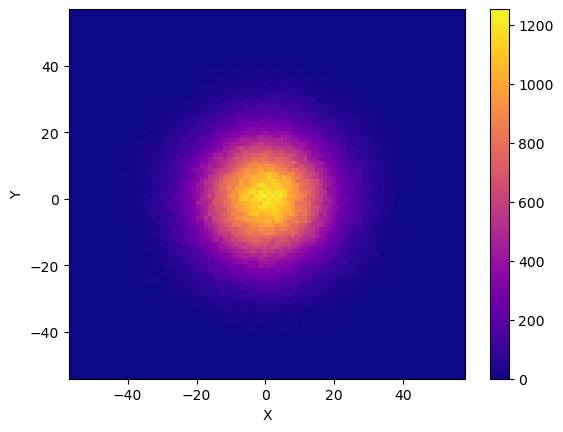

In [ ]:
show_density(
    psi=t_psi,
    warmup_steps=100,
    steps=100,
    step_size=1,
    warmup_step_size=1,
    r_min=r_min,
    r_max=r_max,
    bins=100,
    show_paths=False,
)

In [ ]:
tp = TrialPsi(r_min=r_min, r_max=r_max, num_walkers=100)
tp.theta

tensor([0.0048])

In [ ]:
tp_opt = TrialPsiOptimizer(psi=tp, lr=10)
E_loc = tp_opt.optimize(num_opt_iters=50, num_warmup=1000, num_steps=1000, step_size=1)

Energy: -0.4906 - Theta: 1.0153 - Grad: 0.0000:  54%|█████▍    | 27/50 [00:02<00:02, 10.07it/s]


KeyboardInterrupt: 

In [ ]:
tp.theta